# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов и поучаствовать в соревновании на Kaggle!
Первым делом вам предстоит построить хороший бейзлайн, а дальше пытаться улучшать, соревнуясь с другими участниками.


Ссылка на соревнование: https://www.kaggle.com/c/avito-category-prediction/overview
Данные для домашнего задания можно скачать на странице соревнования.
Чтобы ваше участие было засчитано, убедитесь, что имя в Leaderboard имеет вид: «Имя Фамилия номер_группы».

Оценивание:

Домашнее задание оценивается как обычно. Баллы указаны напротив заданий.

За соревнование даются бонусные баллы следующим образом.
Если вы пересекли baseline_2 на приватном лидерборде, ваша оценка равна 

10 - 10 * (i - 1) / M

где M — количество студентов, принявших участие в соревновании;

i — место (начиная с 1) студента в приватном лидерборде среди всех таких студентов.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* В течение 3 суток после окончания соревнования в соответствующее задание на anytask необходимо прислать код, воспроизводящий ответы для посылки, фигурирующей в приватном лидерборде. В случае отсутствия кода, воспроизводящего результат, в установленный срок студенту выставляется 0 в качестве оценки за соревнование. Если не оговорено иное, использовать любые внешние данные в соревнованиях '''запрещено'''. Под внешними данными понимаются размеченные данные, где разметка имеет прямое отношение к решаемой задаче. Грубо говоря, сборник текстов с википедии не считается внешними данными.


Мы будем работать с датасетом объявлений Avito. Нам предстоит по заголовку и тексту объявления предсказывать категорию объявления.

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
#train = train.sample(10000) # Мой ноутбук не может работать с бОльшими объемами. Мои ответы не будут совпадать, но альтернативы нет...

In [ ]:
# train.head()

In [3]:
train.shape

(4234042, 4)

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [4]:
if train.isnull().any().any():
    print(train.isnull().sum()) # Проверила, пропуски есть; посмотрела где. 

title            0
description      2
Category_name    0
Category         0
dtype: int64


In [5]:
train = train.fillna("")
train.isnull().sum() # Заменила пустыми; проверила. 

title            0
description      0
Category_name    0
Category         0
dtype: int64

In [6]:
if test.isnull().any().any():
    test = test.fillna("") # Аналогично заменила в тествовой выборке. 

In [7]:
test.isnull().sum()

title          0
description    0
itemid         0
dtype: int64

## Задание 2 (0.5 балла)
Сконкатенируйте заголовок и описание в единую строку и поместите результат в отдельный столбец. Таким образом мы будет работать с одним текстом, а не с двумя.

In [8]:
train["title&description"] = train["title"] + train["description"]
#train.head()

In [9]:
test["title&description"] = test["title"] + test["description"]

In [10]:
train

,title,description,Category_name,Category,title&description
0,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год","Комплект ЭБУ (мозги, компьютер мотора, двигате...",Запчасти и аксессуары,10,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 ..."
1,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,21,Утюг утп 1000 ватт СССР 1987 годПродам/\n Фото...
2,Возвму машину с выкупом,Возьму машину в аренду с последующим выкупом н...,Предложение услуг,114,Возвму машину с выкупомВозьму машину в аренду ...
3,Полусапожки,"полусапожки в отличном состоянии, один раз оде...","Одежда, обувь, аксессуары",27,"Полусапожкиполусапожки в отличном состоянии, о..."
4,Босоножки кожаные,"Кожаные(натур) босоножки Karlo Pasolini, 40 рр...","Одежда, обувь, аксессуары",27,Босоножки кожаныеКожаные(натур) босоножки Karl...
...,...,...,...,...,...
4234037,Мопед Дельта Мотоланд 70 кубиков,Продам новый мопед Дельта купленный 18 июня 20...,Мотоциклы и мототехника,14,Мопед Дельта Мотоланд 70 кубиковПродам новый м...
4234038,Xiaomi A2 4/64 почти новый (б/у 3 дня),"Xiaomi A2 версия 4/64. /\nВерсия полноценная, ...",Телефоны,84,Xiaomi A2 4/64 почти новый (б/у 3 дня)Xiaomi A...
4234039,Шерстяной комбинезон Joha,"В отличном состоянии. Мягкий, приятный к телу....",Детская одежда и обувь,29,Шерстяной комбинезон JohaВ отличном состоянии....
4234040,Джинсы фирмы Zara р.152,Новые,Детская одежда и обувь,29,Джинсы фирмы Zara р.152Новые


## Задание 3 (0.5 балла)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Сколько всего уникальных классов необходимо предсказать?
2. Постройте столбчатую диаграмму распределения по классам. Нормализуйте график, чтобы видеть доли, а не абсолютные значения.
3. На сколько большой дисбаланс? Какой класс имеет самую большую долю в выборке (укажите класс и долю), какой класс наименьшую (укажите класс и долю).

1.

In [11]:
print(train["Category"].unique().shape[0], 'уникальных классов.')

50 уникальных классов.


2.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

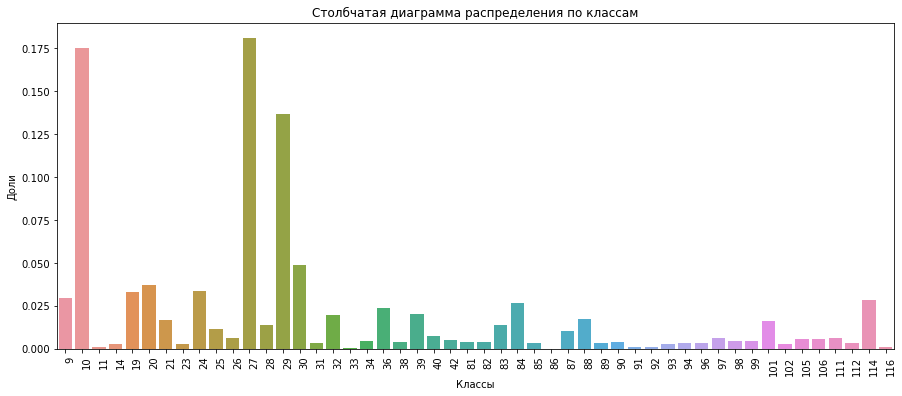

In [13]:
categories = train['Category'].value_counts()
fig, ax = plt.subplots(figsize=(15, 6))
plt.title('Столбчатая диаграмма распределения по классам', loc='center')
ax = sns.barplot(x=categories.index, y=categories.values/categories.values.sum())
ax.set_ylabel('Доли')
ax.set_xlabel('Классы')
plt.xticks(rotation=90, horizontalalignment='left')
plt.show()

3.

In [14]:
print(categories.nsmallest(1))

86    165
Name: Category, dtype: int64


In [16]:
print(categories.nlargest(1))

27    765120
Name: Category, dtype: int64


Меньше всего объявлений в категории 86 (0.00004), больше всего в категории 27 (0.1807). В задании этого нет, но можно попробовать удалить часть данных из наиболее представленных категорий (27, 10, 29, 30). Этои данные выровняет и скорость работы увеличит.

In [15]:
train = train.drop(train[train["Category"] == 27].sample(600000).index, axis=0)
train = train.drop(train[train["Category"] == 10].sample(600000).index, axis=0)
train = train.drop(train[train["Category"] == 29].sample(450000).index, axis=0)
train = train.drop(train[train["Category"] == 30].sample(100000).index, axis=0)

## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью. Для test части нам неизвестны истинные значения, и они понадобятся только тогда, когда мы будем отправлять решение на Kaggle.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
vec = CountVectorizer()
bow = vec.fit_transform(train['title&description'])

In [19]:
print("Размер матрицы:", bow.shape)

Размер матрицы: (2484042, 2569076)


## Задание 5 (0.5 балла)

В предыдущем пункте у вас должная была получится очень большая матрица. Это не дело.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле _vocabulary инстанса этого класса.

1. Найдите в этом словаре все слова, которые начинаются на цифру. Сколько таких слов нашлось?

2. Найдите все слова, которые начинаются на символы пунктуации. Сколько таких слов нашлось? 

In [20]:
import re

In [21]:
A = ' '.join((list(vec.vocabulary_.keys())))

In [22]:
prog = re.compile('[\d]+')
print(len(prog.findall(A)), 'слов начинается на цифру.')

1008192 слов начинается на цифру.


In [23]:
from string import punctuation
punctuation # Узнаем как выглядят знаки пунктуации

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
prog = re.compile('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]+')
print(len(prog.findall(A)), 'слов начинается на пунктуацию.')

12947 слов начинается на пунктуацию.


## Задание 6 (2.5 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. + Приведет все буквы к нижнему регистру
1. + Разобьет текст на токены с помощью word_tokenizer из пакета nltk
2. + Удалит все токены содержащие числа и пунктуацию
3. + Удалит все токены, которые перечислены в nltk.corpus.stopwords('russian')
4. + Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функии на самом первом описании товара в датасете.

Важно: так как функию будет необходимо запускать на большом корпусе, подумайте об эффективной реализации. Постарайтесь решить задачу в минимальное количество циклов и копирований.

Референсная реализация на компьютере автора работала 230 секунд на 100к строчек.

In [25]:
#!pip install nltk

In [26]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vladimir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vladimir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords

In [28]:
st = SnowballStemmer('russian')
sw = stopwords.words('russian')

In [29]:
def tokeniz(i):
    return [st.stem(word) for word in word_tokenize(i.lower()) if (word.isalpha()) and (word not in sw)]

In [30]:
train.head()

,title,description,Category_name,Category,title&description
1,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,21,Утюг утп 1000 ватт СССР 1987 годПродам/\n Фото...
2,Возвму машину с выкупом,Возьму машину в аренду с последующим выкупом н...,Предложение услуг,114,Возвму машину с выкупомВозьму машину в аренду ...
3,Полусапожки,"полусапожки в отличном состоянии, один раз оде...","Одежда, обувь, аксессуары",27,"Полусапожкиполусапожки в отличном состоянии, о..."
4,Босоножки кожаные,"Кожаные(натур) босоножки Karlo Pasolini, 40 рр...","Одежда, обувь, аксессуары",27,Босоножки кожаныеКожаные(натур) босоножки Karl...
6,Сандали котофей,"Котофей фирма, на первые шаги. Размер 20",Детская одежда и обувь,29,"Сандали котофейКотофей фирма, на первые шаги. ..."


In [31]:
print('Пример работы')
print(tokeniz(train['title&description'][3087153])) # Я сделала случайную выборку, т.к. не могла работать с полным датасетом. 

Пример работы
['ford', 'focus', 'горя', 'предложен', 'автомоб', 'пробег', 'рольф', 'витебск', 'налич', 'автомобил', 'обменя', 'сво', 'автомобил', 'выгодн', 'услов', 'уникальн', 'услов', 'продаж', 'автомобил', 'кред', 'представл', 'банк', 'партнер', 'ваш', 'мечт', 'автомобил', 'осуществ', 'сегодн', 'рольф', 'витебск', 'автомобил', 'нача', 'эксплуатац', 'оригина', 'птс', 'собственник', 'все', 'врем', 'своевремен', 'полн', 'комплект', 'ключ', 'оригинальн', 'автомобил', 'прошел', 'комплексн', 'техническ', 'диагностик', 'проверк', 'юридическ', 'сдан', 'зачет', 'систем', 'продавц', 'рольф', 'витебск', 'bluefish', 'эт', 'надежн', 'автомоб', 'пробег', 'куп', 'авт', 'пробег', 'bluefish', 'эт', 'удобн', 'быстр', 'выгодн', 'максимальн', 'выгод', 'обмен', 'сво', 'автомобил', 'установк', 'дополнительн', 'оборудован', 'автомобил', 'прошел', 'комплексн', 'техническ', 'диагностик', 'предпродажн', 'проверк', 'параметр', 'гарант', 'юридическ', 'чистот', 'приглаша', 'проведен', 'пробн', 'ознакомительн', 

## Задание 7 (1 балл)

1. Возьмите случайные 500к строк из датасета. Постройте по ним CountVectorizer с применением вашего токенизатора.
2. Разбейте полученную матрицу на train, test в отношении 4 к 1. Не забудьте про target переменную.
3. Обучите SGDClassifier на полученной выборке.
4. Посчитайте метрику accuracy

1.

In [36]:
train = train.sample(500000)

In [37]:
train

,title,description,Category_name,Category,title&description
3308751,Осенний костюм для утренника в садик,осенний костюм,Детская одежда и обувь,29,Осенний костюм для утренника в садикосенний ко...
2618997,iPhone 6 64 gb,Продам iPhone 6 в хорошем состоянии на 64 ГБ,Телефоны,84,iPhone 6 64 gbПродам iPhone 6 в хорошем состоя...
3674085,Черепаха,Отдам 2-ух черепах с аквариумом,Другие животные,93,ЧерепахаОтдам 2-ух черепах с аквариумом
3760228,Crocs 8,"Отличное состояние , натуральная замша",Детская одежда и обувь,29,"Crocs 8Отличное состояние , натуральная замша"
3431587,Газобаллонное оборудование,Установим газобаллонное оборудование на Nissan...,Запчасти и аксессуары,10,Газобаллонное оборудованиеУстановим газобаллон...
...,...,...,...,...,...
389648,Платье,"Вечернее платье 👗 , длинное в пол, новое","Одежда, обувь, аксессуары",27,"ПлатьеВечернее платье 👗 , длинное в пол, новое"
6614,Подставка для дисков,Подставка для дисков,Мебель и интерьер,20,Подставка для дисковПодставка для дисков
2642237,Пазлы,Все в отличном состоянии,Спорт и отдых,39,ПазлыВсе в отличном состоянии
1107298,Косметологический аппарат IM-5566,Косметологический аппарат IM-5566 предназначен...,Оборудование для бизнеса,40,Косметологический аппарат IM-5566Косметологиче...


In [38]:
vec = CountVectorizer(tokenizer=tokeniz)
A2 = vec.fit_transform(train['title&description'])

In [42]:
A2

<500000x379522 sparse matrix of type '<class 'numpy.int64'>'
	with 13691518 stored elements in Compressed Sparse Row format>

2.

In [39]:
from sklearn.model_selection import train_test_split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(A2, train["Category"], test_size=0.2, random_state=np.random.seed())

3.

In [99]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report

In [100]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
sgd_y_pred = sgd.predict(X_test)

4.

In [101]:
print(classification_report(y_test, sgd_y_pred))

              precision    recall  f1-score   support

           9       0.95      0.92      0.93      5107
          10       0.86      0.90      0.88      5705
          11       0.89      0.82      0.85       212
          14       0.89      0.62      0.73       475
          19       0.73      0.83      0.77      5642
          20       0.73      0.83      0.77      6238
          21       0.74      0.80      0.77      2779
          23       0.94      0.90      0.92       470
          24       0.98      0.99      0.98      5638
          25       0.97      0.98      0.97      1937
          26       0.99      0.98      0.99      1137
          27       0.70      0.86      0.77      6707
          28       0.85      0.85      0.85      2371
          29       0.78      0.80      0.79      5081
          30       0.77      0.73      0.75      4241
          31       0.91      0.73      0.81       576
          32       0.75      0.83      0.79      3317
          33       0.78    

ИТОГО: weighted accuracy = 81%. Если использовать для обучения все данные, она, вероятно, повысится. 

## Задание 8 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество.
2. Мы можем еще сильнее уменьшите размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


1.

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [103]:
tfidf_vec = TfidfVectorizer(tokenizer=tokeniz)
A2 = tfidf_vec.fit_transform(train['title&description'])

In [104]:
print("Размер матрицы:", A2.shape)

Размер матрицы: (500000, 379522)


In [105]:
X_train, X_test, y_train, y_test = train_test_split(A2, train["Category"], test_size=0.2, random_state=np.random.seed())

In [106]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
sgd_y_pred = sgd.predict(X_test)

In [107]:
print(classification_report(y_test, sgd_y_pred))

              precision    recall  f1-score   support

           9       0.86      0.97      0.91      5024
          10       0.82      0.87      0.85      5657
          11       0.81      0.82      0.82       175
          14       0.86      0.50      0.63       478
          19       0.74      0.77      0.75      5706
          20       0.71      0.80      0.75      6047
          21       0.77      0.73      0.75      2794
          23       0.91      0.82      0.87       492
          24       0.96      0.99      0.97      5722
          25       0.93      0.98      0.96      1934
          26       0.97      0.98      0.97      1118
          27       0.73      0.83      0.78      6603
          28       0.78      0.88      0.83      2428
          29       0.75      0.77      0.76      5141
          30       0.76      0.71      0.73      4299
          31       0.76      0.70      0.73       565
          32       0.76      0.82      0.79      3371
          33       0.69    

C:\Users\vladimir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ИТОГО: weighted accuracy = 79%. 

2.

In [108]:
tfidf_vec = TfidfVectorizer(tokenizer=tokeniz, max_df=0.9)
A2 = tfidf_vec.fit_transform(train['title&description'])

In [109]:
print("Размер матрицы:", A2.shape)

Размер матрицы: (500000, 379522)


In [110]:
X_train, X_test, y_train, y_test = train_test_split(A2, train["Category"], test_size=0.2, random_state=np.random.seed())

In [111]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
sgd_y_pred = sgd.predict(X_test)

In [112]:
print(classification_report(y_test, sgd_y_pred))

              precision    recall  f1-score   support

           9       0.86      0.97      0.91      4960
          10       0.83      0.87      0.85      5719
          11       0.83      0.84      0.84       217
          14       0.83      0.49      0.62       532
          19       0.74      0.76      0.75      5687
          20       0.73      0.81      0.77      6272
          21       0.78      0.74      0.76      2860
          23       0.92      0.82      0.87       470
          24       0.96      0.99      0.97      5637
          25       0.93      0.98      0.96      1978
          26       0.97      0.97      0.97      1095
          27       0.73      0.84      0.78      6680
          28       0.78      0.88      0.83      2374
          29       0.75      0.77      0.76      5183
          30       0.76      0.69      0.73      4306
          31       0.80      0.70      0.75       595
          32       0.75      0.82      0.78      3297
          33       0.74    

ИТОГО: weighted accuracy = 79%. 

## Задание 9 (1 балл)
Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 30000.
2. Какой из трех подходов показал самый высокий результат?

In [113]:
from sklearn.feature_extraction.text import HashingVectorizer

In [114]:
vec = HashingVectorizer(tokenizer=tokeniz, n_features=30000)
A2 = vec.fit_transform(train['title&description'])

C:\Users\vladimir\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [115]:
X_train, X_test, y_train, y_test = train_test_split(A2, train["Category"], test_size=0.2, random_state=np.random.seed())

In [116]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
sgd_y_pred = sgd.predict(X_test)

In [117]:
print(classification_report(y_test, sgd_y_pred))

              precision    recall  f1-score   support

           9       0.85      0.96      0.90      5104
          10       0.81      0.85      0.83      5771
          11       0.86      0.83      0.84       233
          14       0.77      0.40      0.53       480
          19       0.70      0.71      0.71      5606
          20       0.70      0.77      0.73      6147
          21       0.72      0.71      0.72      2887
          23       0.89      0.83      0.86       462
          24       0.95      0.99      0.97      5716
          25       0.91      0.98      0.95      1893
          26       0.96      0.97      0.96      1080
          27       0.69      0.82      0.75      6647
          28       0.76      0.86      0.81      2424
          29       0.74      0.73      0.73      5183
          30       0.73      0.67      0.70      4288
          31       0.78      0.73      0.75       563
          32       0.73      0.79      0.76      3297
          33       0.75    

ИТОГО: weighted accuracy = 76%. 

Лучше всего показатели у TfidfVectorizer

## Задание 10 (1.5 балла)

Пришло время выйти в мир. Отправляйтесь на Kaggle Inclass и сделайте первую посылку. Там вы найдете инструкцию как сформировать файл с предсказаниями и отправить его.

In [118]:
import csv

In [119]:
test.head()

,title,description,itemid,title&description
0,Мастерка,Мастерка фирмы форвард. Белого цвета. В идеаль...,1778449823,МастеркаМастерка фирмы форвард. Белого цвета. ...
1,Зимние сапоги,"Продаю зимние сапоги, в хорошем состоянии, все...",1677656962,"Зимние сапогиПродаю зимние сапоги, в хорошем с..."
2,Видеонаблюдение 8 камер,В комплект Atis AMD-2MIR-8kit входит: /\n1. Ку...,1758182804,Видеонаблюдение 8 камерВ комплект Atis AMD-2MI...
3,Запчасти для GLE,Запчасти GLE,1689811299,Запчасти для GLEЗапчасти GLE
4,Бластер nerf,Состояние 5+/\nПродаю потому что не нужен/\n18...,1804706240,Бластер nerfСостояние 5+/\nПродаю потому что н...


In [120]:
vec = HashingVectorizer(tokenizer=tokeniz, n_features=30000)
A2 = vec.fit_transform(test['title&description'])

C:\Users\vladimir\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [121]:
sgd_y_pred = sgd.predict(A2)

In [137]:
df = pd.DataFrame(sgd_y_pred, index=test['itemid'], columns = ['Category'])
df = df.rename_axis('Id')
df.to_csv('test_predict.csv')
df

,Category
Id,
1778449823,29
1677656962,29
1758182804,32
1689811299,10
1804706240,29
...,...
902146704,19
1799983289,10
1177237748,29
